#Extracción de los datos

In [1]:
import pandas as pd

#Carga de los datos desde una API
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

#### Creación de un dataframe para la visualización de los datos.

In [2]:
try:
    df = pd.read_json(url)
    print(f"DataFrame cargado exitosamente. Filas: {len(df)}, Columnas: {len(df.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")

df.head()

DataFrame cargado exitosamente. Filas: 7267, Columnas: 6


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Transformación

#### Explorar las columnas del dataset y verificar sus tipos de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB




Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

Columnas más relevantes para el análisis:

* customerID: Esta columna es para identificar al cliente de forma unica
* Churn: Es la que nos indica si el cliente abandono o no
* ternure: Nos dice por cuanto tiempo el cliente estuvo en la empresa
* InternetService: Columna para conocer las preferencias del cliente
* Contract: El tipo de contrato que tiene el cliente
* Charges.Monthly: Total de los servicios del cliente, para conocer su facturación
* Charges.Total: Todo lo que gastó el cliente en los servicios




#### Comprobación de incoherencias en los datos

In [4]:
# Verificación de datos nulos
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [5]:
#Verificación de datos duplicados
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [6]:
#Busando Strings vacios.
(df == '').sum()

,0
customerID,0
Churn,224
customer,0
phone,0
internet,0
account,0


In [7]:
#Buscando errores de formato
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


#### Manejo de inconsistencias

In [8]:
#Crearemos un nuevo DataFrame en el cual se eliminen los Strings vacíos de la columna "Churn"

dfLimpio = df[df['Churn'] != ''].copy()

In [9]:
#Verificamos que se hayan eliminado los strings vacios
(dfLimpio == '').sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [10]:
# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
dfLimpio['Churn'] = dfLimpio['Churn'].map({'Yes': 1, 'No': 0})

#Carga y análisis

####Análisis descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [11]:
dfLimpio.describe()

,Churn
count,7043.000000
mean,0.265370
std,0.441561
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#### Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Análisis de la Distribución de Evasión:
Churn
0    5174
1    1869
Name: count, dtype: int64


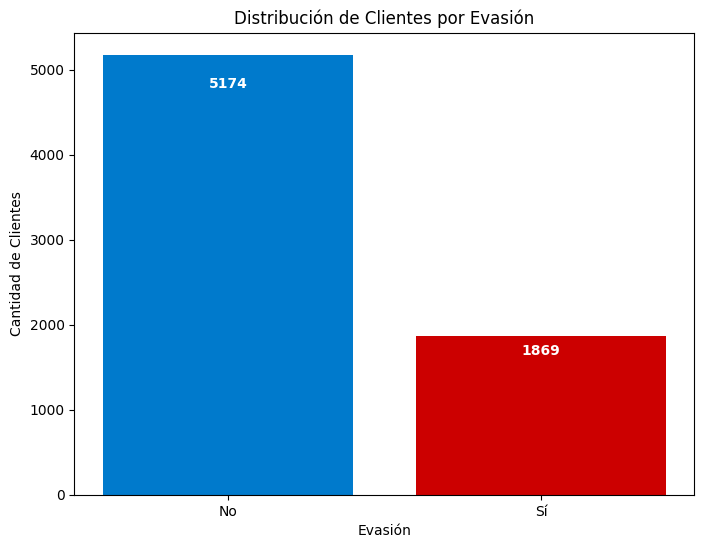

In [12]:
import matplotlib.pyplot as plt

# Calcular la distribución de la variable 'Churn'
distChurn= dfLimpio['Churn'].value_counts()
print("Análisis de la Distribución de Evasión:")
print(distChurn)

# Crear el gráfico de barras para visualizar la distribución
etiquetas = ['No', 'Sí']
valores = [distChurn.get(0, 0), distChurn.get(1, 0)]
plt.figure(figsize=(8, 6))
bars = plt.bar(etiquetas, valores, color=['#007ACC', '#CC0000'])
plt.title('Distribución de Clientes por Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Evasión')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - (yval * 0.05), int(yval), va='top', ha='center', color='white', fontweight='bold')
plt.show()

#### Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

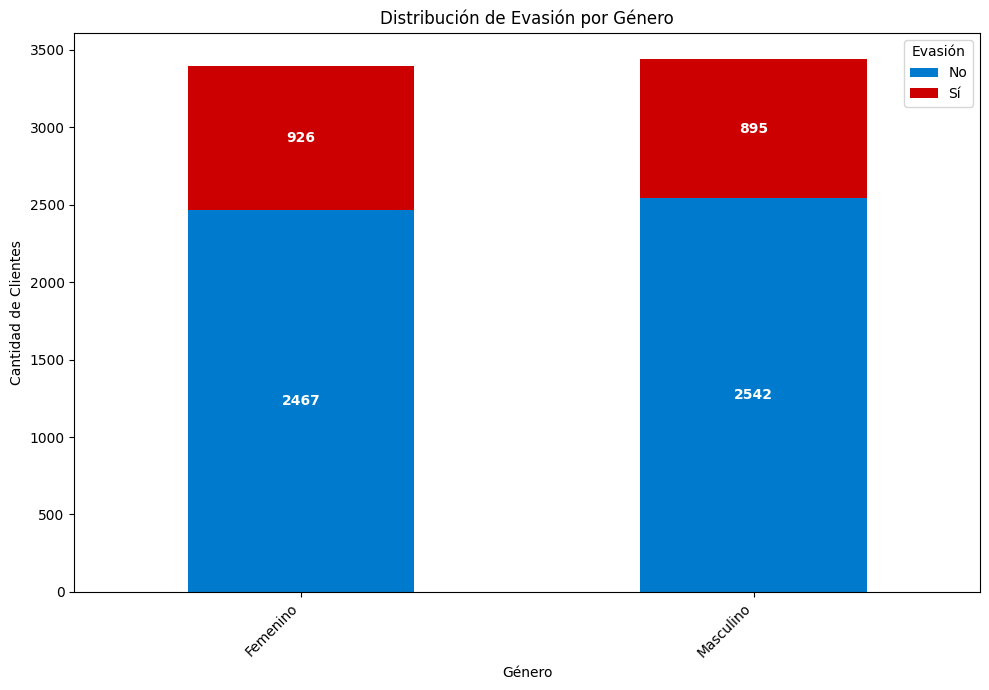

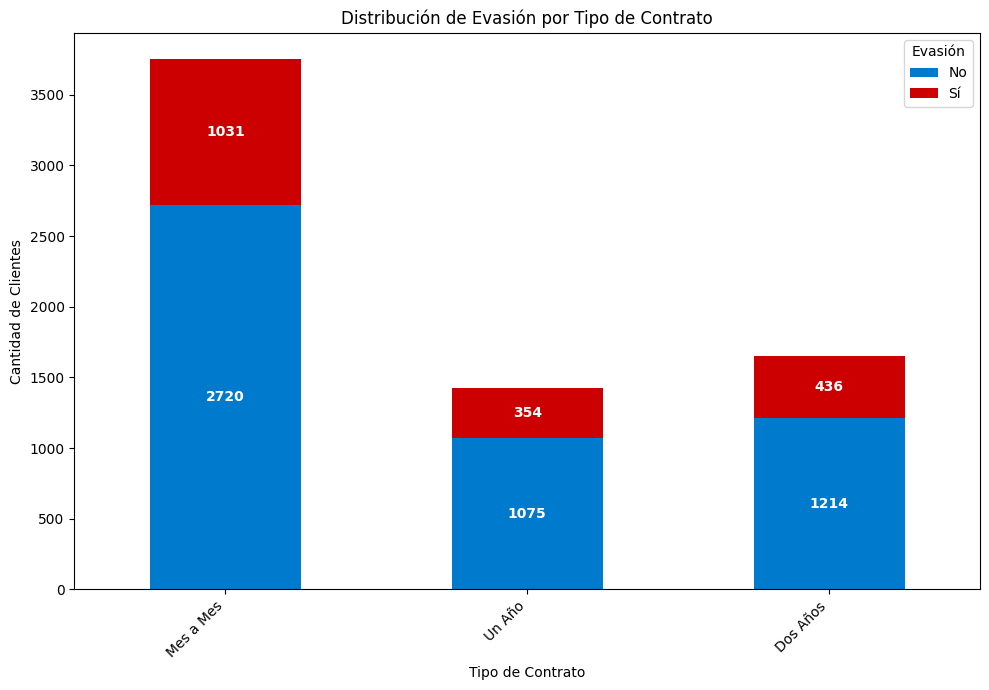

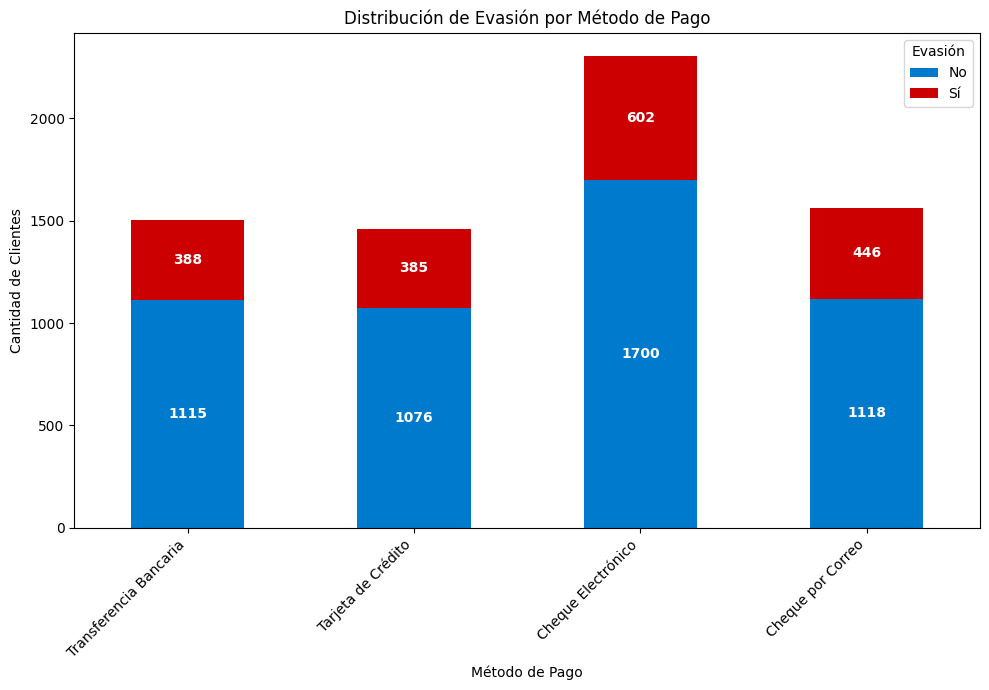

In [20]:
# Crear un nuevo DataFrame 'df_limpio'
dfLimpio = df[df['Churn'] != ''].copy()

dfLimpio['cuentasDiarias'] = dfLimpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
dfLimpio = df_limpio.rename(columns=mapeo_columnas)

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
dfClienteNorm = pd.json_normalize(df_limpio['Cliente'])
dfInternetNorm = pd.json_normalize(df_limpio['Servicio_Internet'])
dfCuentaNorm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = dfLimpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, dfClienteNorm, dfInternetNorm, dfCuentaNorm], axis=1)

#---Análisis y Visualización de Evasión por Categoría---

# Lista de variables categóricas a analizar
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años',
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia Bancaria',
    'Credit card (automatic)': 'Tarjeta de Crédito'
}
varAn = ['gender', 'Contract', 'PaymentMethod']
nomEsp = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Nombres en español para los títulos de los gráficos
nomEsp = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Desarrollo del gráfico
for i, variable in enumerate(varAn):


    crosstab = pd.crosstab(df_final[variable], df_final['Evasion'])
    crosstab.rename(index=traducciones, inplace=True)
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#007ACC', '#CC0000'])

    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', color='white', fontweight='bold')

    # Configurar el gráfico
    plt.title(f'Distribución de Evasión por {nomEsp[i]}')
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(nombres_en_espanol[i])
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión', labels=['No', 'Sí'])

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.show()

####Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes

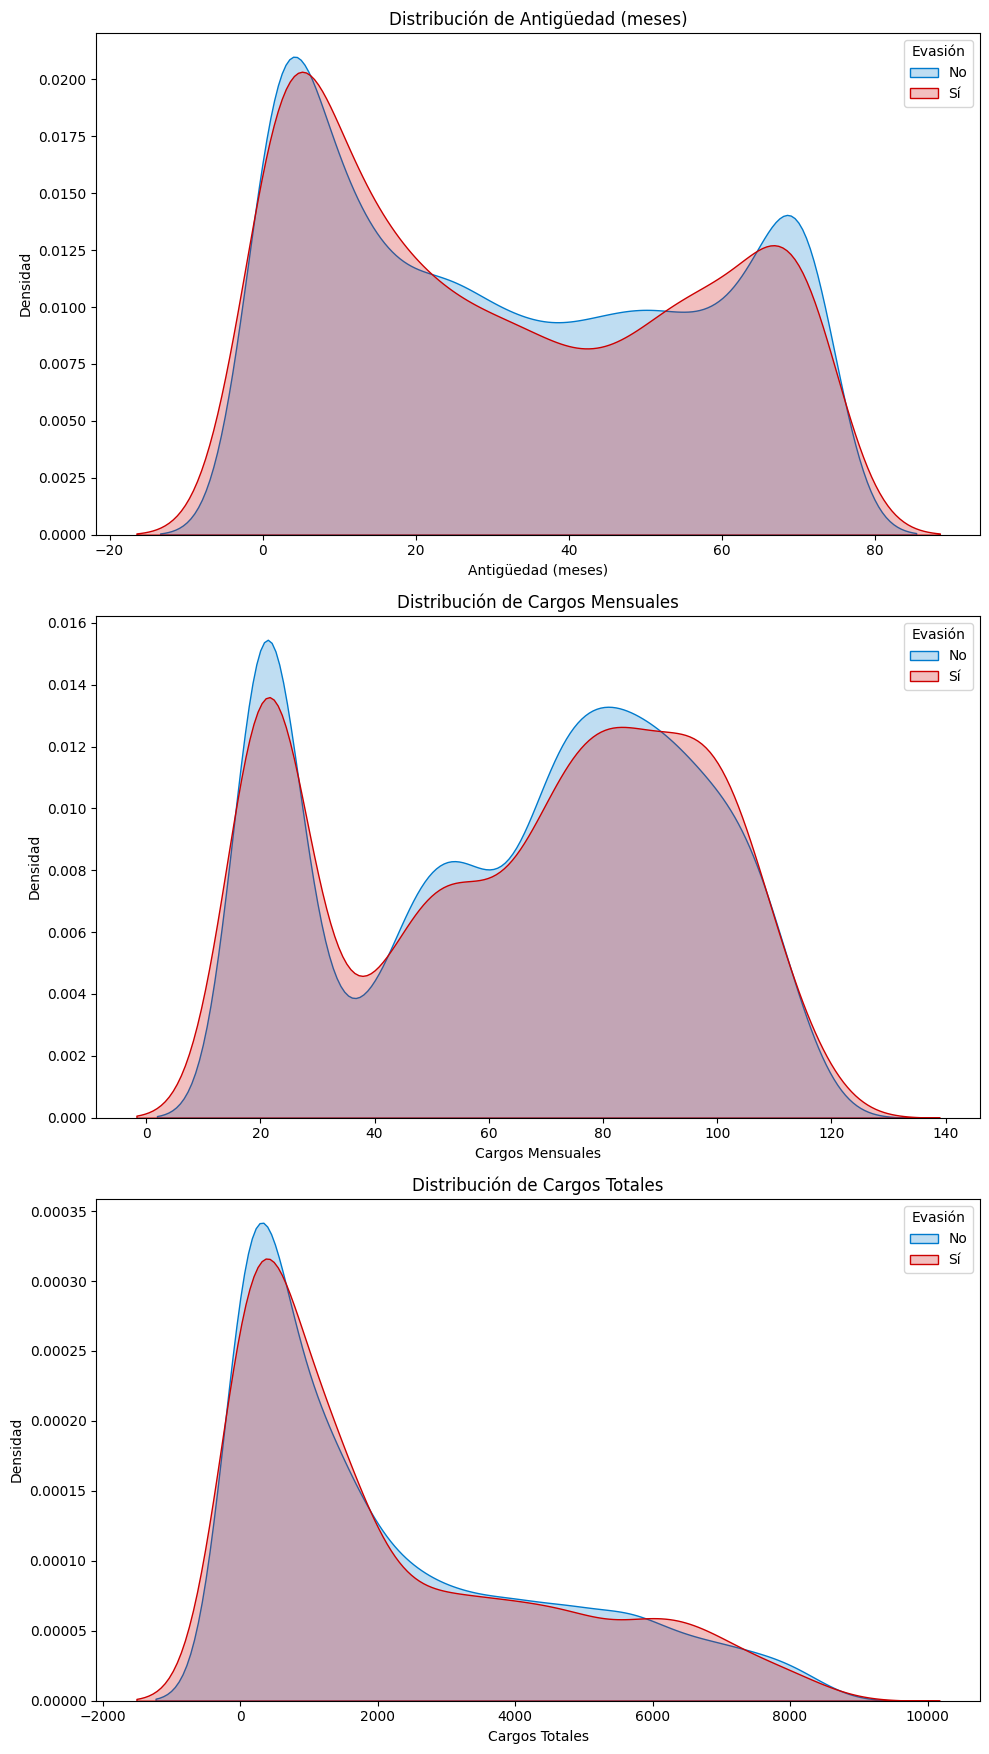

In [22]:
import seaborn as sns
#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

# Lista de variables numéricas a analizar
varNum = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Nombres en español para los títulos de los gráficos
nomEsp = ['Antigüedad (meses)', 'Cargos Mensuales', 'Cargos Totales']

# Crear una figura con múltiples subplots para asegurar un tamaño consistente
fig, axes = plt.subplots(nrows=len(varNum), ncols=1, figsize=(10, 6 * len(varNum)))

# Desarrollo del gráfico
for i, variable in enumerate(varNum):

    ax = axes[i]
    sns.kdeplot(df_final[df_final['Evasion'] == 0][variable], label='No', fill=True, color='#007ACC', ax=ax)
    sns.kdeplot(df_final[df_final['Evasion'] == 1][variable], label='Sí', fill=True, color='#CC0000', ax=ax)


    ax.set_title(f'Distribución de {nomEsp[i]}')
    ax.set_xlabel(nomEsp[i])
    ax.set_ylabel('Densidad')
    ax.legend(title='Evasión')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#Informe final


🔹 Introducción:

Telecom X - Análisis de Evasión de Clientes

La empresa "Telecom X" enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir deel análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

🔹 Limpieza y Tratamiento de Datos:

Se llevó a cabo una revisión  para garantizar la calidad de los datos:

* Valores Ausentes: No se encontraron valores nulos en el conjunto de datos.
* Valores Duplicados: No se detectaron filas duplicadas basadas en el customerID y Churn.
* Errores de Formato: La verificación inicial de tipos de datos no reveló errores obvios de formato, aunque los detalles dentro de los datos anidados se abordaron después de la normalización.
* Inconsistencias en Categorías: Se descubrió que la columna Churn contenía valores vacíos (''). Se identificaron 224 filas con esta inconsistencia, que fueron eliminadas. El DataFrame resultante, df_limpio, quedó con 7043 filas.


Para enriquecer el análisis, se realizaron las siguientes transformaciones:

* Creación de la Columna cuentasDiarias: Se calculó el costo diario dividiendo los cargos mensuales por 30.
* Estandarización de Churn: La columna Churn se convirtió a un formato binario (1 para 'Sí' y 0 para 'No').
* Renombramiento de Columnas: Las columnas se renombraron al español para una mejor comprensión.
* Normalización de Datos Anidados: Las columnas con datos anidados (Cliente, Servicio_Internet, Cuenta, etc.) se "descomprimieron" utilizando pd.json_normalize. Esto convirtió la información de los diccionarios en columnas individuales, creando un df_final listo para el análisis.

🔹 Análisis Exploratorio de Datos:

Se calcularon estadísticas descriptivas para las variables numéricas, lo que proporcionó una visión general de medidas como la media, la mediana y la desviación estándar. La tasa de evasión promedio en el conjunto de datos se situó en un 26.5%.
Distribución de Evasión

El análisis de la variable "Evasion" mostró un desbalance en los datos:
* Clientes que no cancelaron (No): 5174 (73.5%)
* Clientes que cancelaron (Sí): 1869 (26.5%)

Esta visualización inicial es clave para entender la magnitud del problema del churn.

Recuento de Evasión por Variables Categóricas
Se analizaron varias variables categóricas para identificar perfiles de clientes con mayor propensión a la evasión:

* Género: La tasa de evasión es prácticamente la misma para hombres y mujeres, lo que indica que el género no es un factor diferenciador.
* Tipo de Contrato: Se observa una tasa de evasión marcadamente más alta en los clientes con contrato "Mes a Mes", en comparación con los contratos anuales o bianuales.
* Método de Pago: Los clientes que pagan con "Cheque Electrónico" tienen una tasa de evasión notablemente superior a los demás métodos de pago.

Conteo de Evasión por Variables Numéricas

La distribución de las variables numéricas reveló diferencias significativas entre los clientes que se quedaron y los que se fueron:

* Antigüedad (tenure): Los clientes que cancelaron tienden a tener una antigüedad mucho menor. La mayoría de las cancelaciones ocurren en los primeros meses de servicio.
* Cargos Mensuales: Los clientes que cancelaron suelen tener cargos mensuales más altos.
* Cargos Totales: Inversamente a los cargos mensuales, los clientes que cancelan tienden a tener cargos totales acumulados más bajos, lo cual está correlacionado con su menor antigüedad.

🔹 Conclusiones e Insights:

Los clientes tienden a prescindir del servicio por alguna posible inconformidad en el contrato el cual puede ser, según los datos, por los métodos de pago.
